In [1]:
import pylab
import simulationRunner
import continuous

# Basic lane drop case with congestion #

Case with two links connected by an one-to-one connection and origin and one destination Node


In [2]:
from continuous.originNode import OriginNode
from continuous.destinationNode import DestinationNode
from continuous.oneToOneNode import OneToOneNode
from continuous.link import Link

inbound_link = Link(length=300, vf=30.0, w=6.0, kj=0.2)
outbound_link = Link(length=300, vf=30.0, w=6.0, kj=0.1)

demands = [0.3, 0.6, 0.3]
origin_node = OriginNode(1, inbound_link, demands)
oneOneNode = OneToOneNode(2, inbound_link, outbound_link)
destination_node = DestinationNode(3, outbound_link)

links = [inbound_link, outbound_link]
nodes = [origin_node, oneOneNode, destination_node]

sim = simulationRunner.SimulationRunner(links = links, nodes = nodes, time_step = 1, total_time=600)
sim.run()


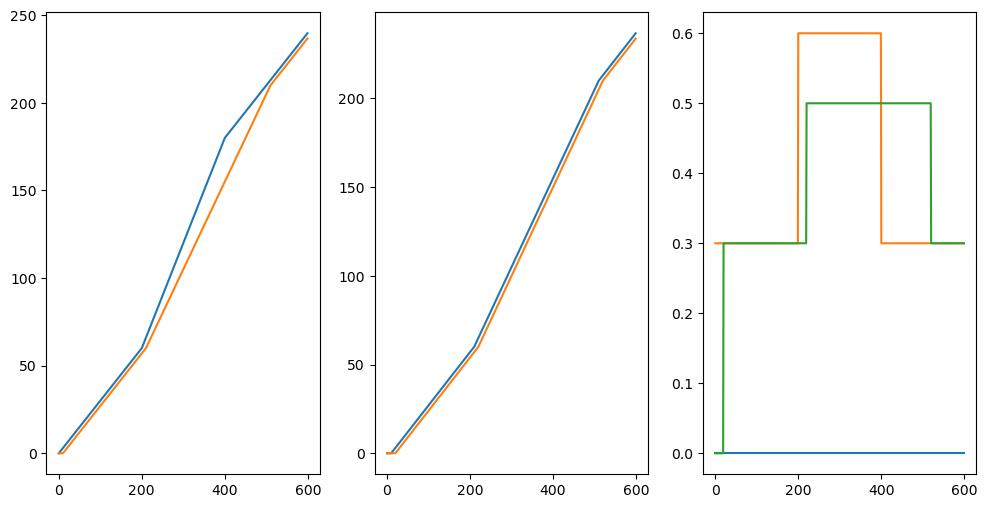

In [3]:
f, axs = pylab.subplots(1,3, figsize=(12,6))

from_step = 0
to_step = 600
axs[0].plot(inbound_link.cumulative_inflows[from_step:to_step])
axs[0].plot(inbound_link.cumulative_outflows[from_step:to_step])

axs[1].plot(outbound_link.cumulative_inflows[from_step:to_step])
axs[1].plot(outbound_link.cumulative_outflows[from_step:to_step])

axs[2].plot(origin_node.entry_queue[from_step:to_step])
axs[2].plot(origin_node.outflow[from_step:to_step])
axs[2].plot(destination_node.inflow[from_step:to_step])

pylab.show()